In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression
from rapidfuzz import fuzz

In [28]:
df = pd.read_csv('student.csv')
df

,Student_Names,Phone_No.,Math,Physics,Chemistry,Grade,Comment,Roll No.,School Name,Student Address
0,Donald Contreras,9208625450,76,84,54,B+,Good Pursuance,524613,Martin Luther School,"478 Mooney Park, New Valerie, VI 28836"
1,Joseph Horton,9886408555,91,75,78,A,Very Good Achivement,561635,Martin Luther School,"037 Matthew Shores, Greeneton, CA 98399"
2,Savannah Burns MD,9047592659,64,98,20,C,Below Average Achivement,560985,Martin Luther School,"96124 Lloyd Streets, Edwardmouth, DC 61677"
3,William Carter,9048473864,15,95,32,D,Poor Pursuance,535126,Martin Luther School,"11959 Clark Village, Ivanview, NH 43940"
4,John Rodriguez,9685225730,86,86,66,B+,Good Pursuance,559410,Martin Luther School,"051 Weaver Glen Apt. 724, West Davidborough, M..."
...,...,...,...,...,...,...,...,...,...,...
8995,Kimberly Stevens,9129352703,40,87,65,B,Average Performance,569342,Martin Luther School,"27054 Adrian Streets, Diazmouth, OH 81346"
8996,Kelsey Bonilla,9649715711,56,84,75,B+,Good Pursuance,530124,Martin Luther School,"570 Christopher Run, Williammouth, ND 11535"
8997,Kelly Dunn,9825362271,80,70,16,C,Below Average Achivement,592266,Martin Luther School,"32283 Carpenter Summit, North Patricia, PR 51483"
8998,Joseph Nichols,9363540473,24,95,59,C,Below Average Achivement,583028,Martin Luther School,"2336 Blackburn Fall Apt. 905, South Shelby, ND..."


In [4]:
df.shape

(9000, 10)

In [29]:
df = df.head(100)

In [30]:
df.shape

(100, 10)

In [31]:
df.describe()

,Phone_No.,Math,Physics,Chemistry,Roll No.
count,1.000000e+02,100.000000,100.000000,100.000000,100.000000
mean,9.530020e+09,52.900000,52.150000,55.860000,548678.100000
std,3.143422e+08,25.936402,26.381573,24.733742,26219.159904
min,9.010621e+09,11.000000,12.000000,11.000000,503275.000000
25%,9.247612e+09,29.750000,31.000000,37.000000,527479.250000
50%,9.559944e+09,54.500000,49.500000,55.500000,547135.500000
75%,9.796126e+09,76.000000,75.500000,75.250000,573008.000000
max,9.999427e+09,100.000000,100.000000,100.000000,599023.000000


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Student_Names    100 non-null    object
 1   Phone_No.        100 non-null    int64 
 2   Math             100 non-null    int64 
 3   Physics          100 non-null    int64 
 4   Chemistry        100 non-null    int64 
 5   Grade            100 non-null    object
 6   Comment          100 non-null    object
 7   Roll No.         100 non-null    int64 
 8   School Name      100 non-null    object
 9   Student Address  100 non-null    object
dtypes: int64(5), object(5)
memory usage: 7.9+ KB


In [33]:
df.dtypes

Student_Names      object
Phone_No.           int64
Math                int64
Physics             int64
Chemistry           int64
Grade              object
Comment            object
Roll No.            int64
School Name        object
Student Address    object
dtype: object

In [34]:
df.isnull().sum()

Student_Names      0
Phone_No.          0
Math               0
Physics            0
Chemistry          0
Grade              0
Comment            0
Roll No.           0
School Name        0
Student Address    0
dtype: int64

<Axes: xlabel='Math', ylabel='Count'>

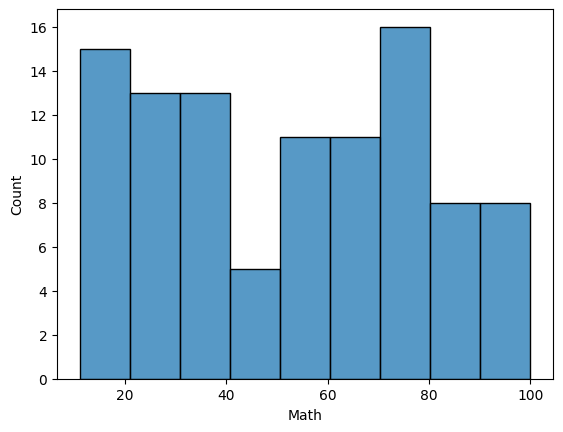

In [35]:
sns.histplot(x=df['Math'],bins=9)

<Axes: xlabel='Physics', ylabel='Density'>

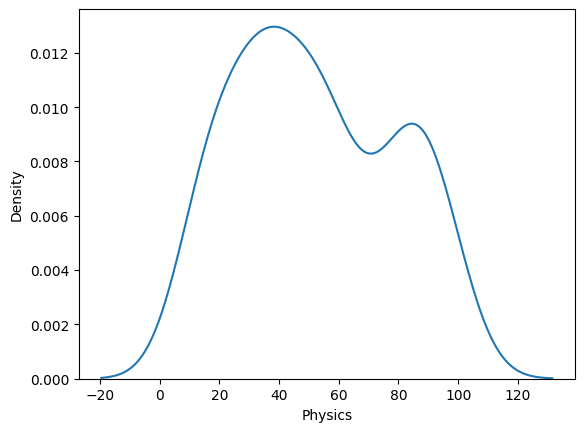

In [36]:
sns.kdeplot(df['Physics'])

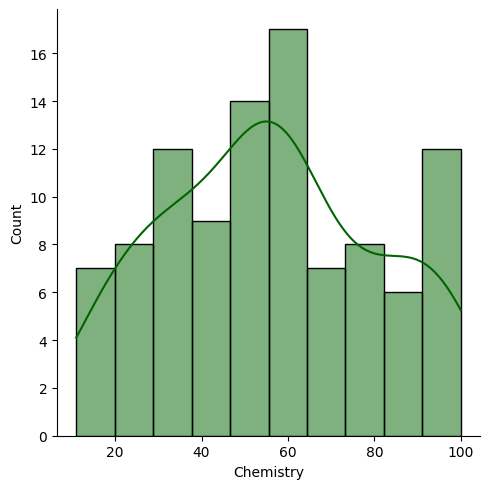

In [37]:
sns.displot(df['Chemistry'], kind='hist', kde=True, color='darkgreen',bins=10)


<Axes: ylabel='Math'>

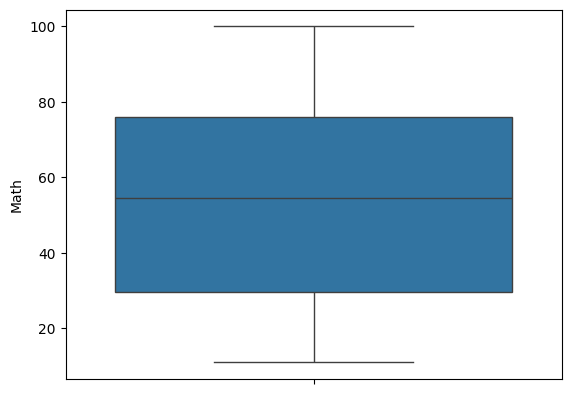

In [38]:
sns.boxplot(df['Math'])

<Axes: ylabel='Physics'>

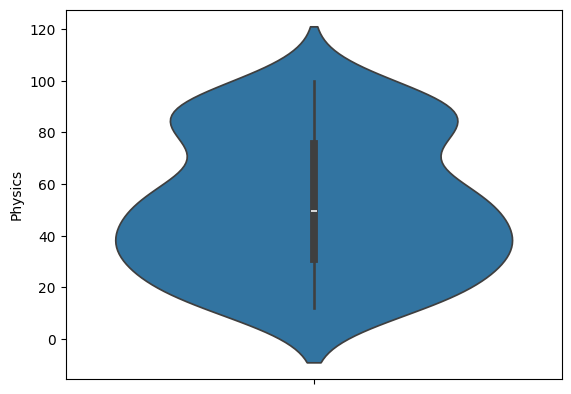

In [39]:
sns.violinplot(df['Physics'])

<Axes: xlabel='count', ylabel='Grade'>

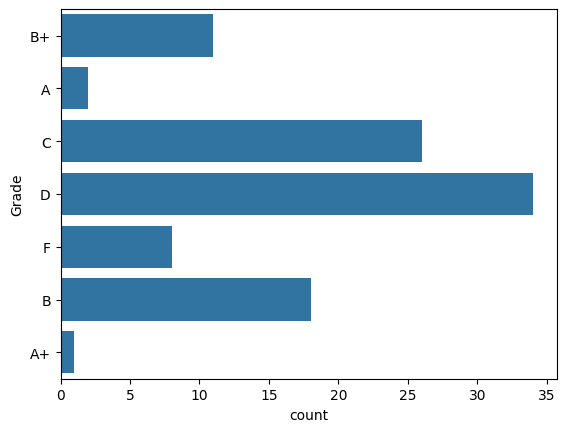

In [41]:
sns.countplot(df['Grade'])

<Axes: xlabel='Grade', ylabel='Chemistry'>

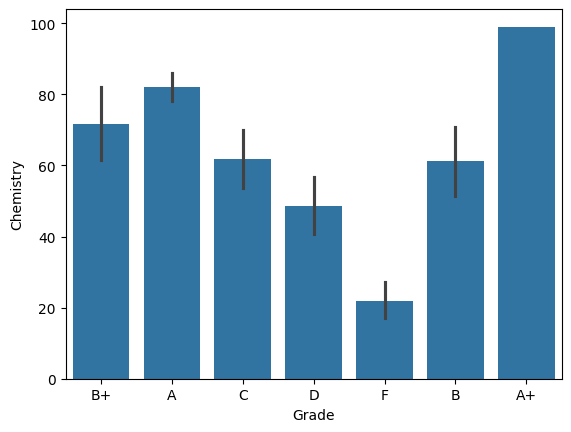

In [43]:
sns.barplot(x='Grade', y='Chemistry', data=df)


<Axes: xlabel='Grade', ylabel='Math'>

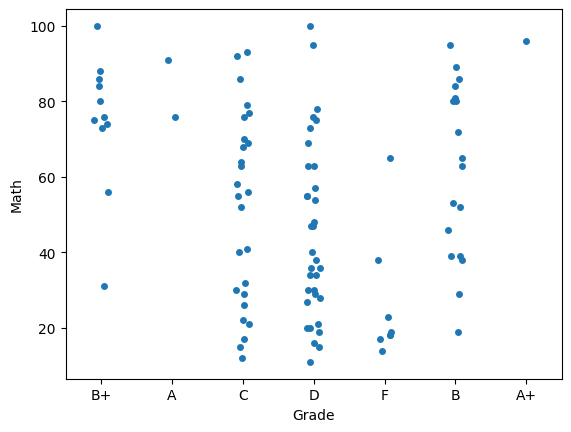

In [44]:
sns.stripplot(x='Grade', y='Math', data=df)

<Axes: xlabel='Grade', ylabel='Math'>

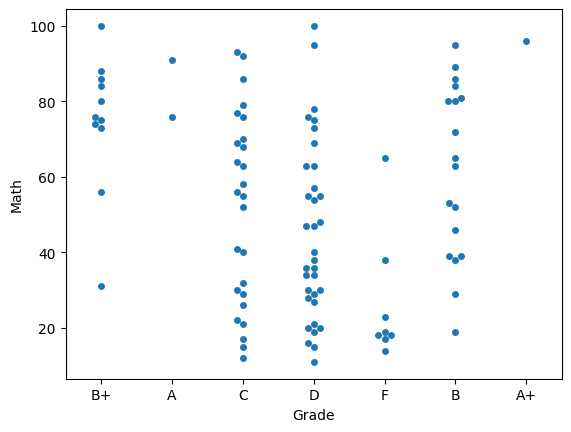

In [45]:
sns.swarmplot(x='Grade', y='Math', data=df)

<Axes: xlabel='Chemistry', ylabel='Math'>

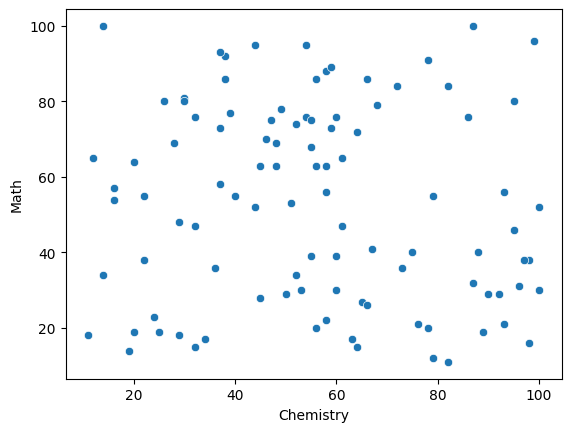

In [46]:
sns.scatterplot(data = df, x=df['Chemistry'],y=df['Math'])

<Axes: xlabel='Grade', ylabel='Chemistry'>

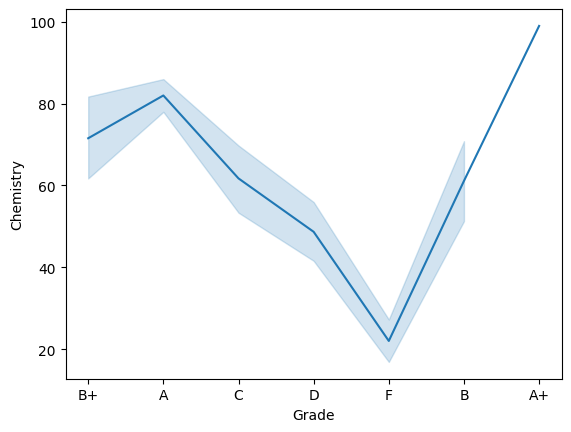

In [47]:
sns.lineplot(data=df,x='Grade',y='Chemistry',markers='x')

<Axes: >

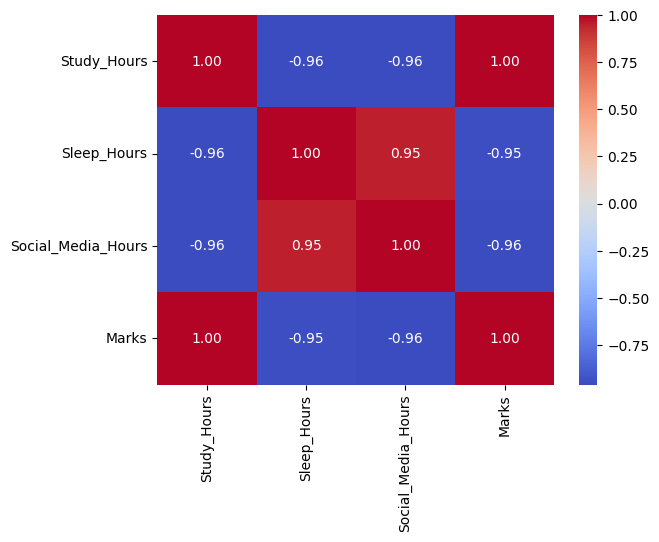

In [48]:
data = {
    "Study_Hours": [2,3,4,5,6,7,8,9,10,11,3,4,5,6,7,8,9,10,11,12],
    "Sleep_Hours": [8,7,6,6,6,5,5,5,4,4,8,7,7,6,6,5,5,4,4,3],
    "Social_Media_Hours": [5,4,3,3,2,2,2,1,1,1,5,4,3,3,2,2,1,1,1,0],
    "Marks": [45,50,55,60,68,72,78,82,88,92,48,54,62,66,74,80,86,91,95,98]
}

df1 = pd.DataFrame(data)

sns.heatmap(df1.corr(), annot=True, cmap="coolwarm", fmt=".2f")


In [18]:
data = {
    "Study_Hours": [2, 3, np.nan, 5, 6, np.nan, 8],
    "Marks": [45, np.nan, 55, 60, np.nan, 75, 80]
}
df2 = pd.DataFrame(data)

print("Original DataFrame:\n", df2)

df_ffill = df2.fillna(method="ffill")
print("\nForward Fill (ffill):\n", df_ffill)


Original DataFrame:
    Study_Hours  Marks
0          2.0   45.0
1          3.0    NaN
2          NaN   55.0
3          5.0   60.0
4          6.0    NaN
5          NaN   75.0
6          8.0   80.0

Forward Fill (ffill):
    Study_Hours  Marks
0          2.0   45.0
1          3.0   45.0
2          3.0   55.0
3          5.0   60.0
4          6.0   60.0
5          6.0   75.0
6          8.0   80.0


In [ ]:
data = {
    "Study_Hours": [2, 3, np.nan, 5, 6, np.nan, 8],
    "Marks": [45, np.nan, 55, 60, np.nan, 75, 80]
}
df2 = pd.DataFrame(data)


print("Original DataFrame:\n", df2)

df_ffill = df2.fillna(method="bfill")
print("\nForward Fill (ffill):\n", df_ffill)


Original DataFrame:
    Study_Hours  Marks
0          2.0   45.0
1          3.0    NaN
2          NaN   55.0
3          5.0   60.0
4          6.0    NaN
5          NaN   75.0
6          8.0   80.0

Forward Fill (ffill):
    Study_Hours  Marks
0          2.0   45.0
1          3.0   55.0
2          5.0   55.0
3          5.0   60.0
4          6.0   75.0
5          8.0   75.0
6          8.0   80.0


In [26]:
data = {
    "Study_Hours": [2, np.nan, 4, 5, np.nan],
    "Marks": [45, 50, np.nan, 60, 70],
    "Name": ["Alice", None, "Charlie", None, "Eve"]
}
df3 = pd.DataFrame(data)
print("Original DataFrame:\n", df3)

# 3-in-1 fillna
df_filled = df3.fillna({
    "Study_Hours": 0,        
    "Marks": 0,             
    "Name": "no name"        
})

print("\nAfter 3-in-1 fillna:\n", df_filled)

Original DataFrame:
    Study_Hours  Marks     Name
0          2.0   45.0    Alice
1          NaN   50.0     None
2          4.0    NaN  Charlie
3          5.0   60.0     None
4          NaN   70.0      Eve

After 3-in-1 fillna:
    Study_Hours  Marks     Name
0          2.0   45.0    Alice
1          0.0   50.0  no name
2          4.0    0.0  Charlie
3          5.0   60.0  no name
4          0.0   70.0      Eve


In [55]:
df.duplicated().sum()

0

In [54]:
df.duplicated(subset='Student_Names').sum()

0

In [60]:
df['Math'].value_counts()

76    4
63    4
29    3
55    3
38    3
     ..
72    1
74    1
31    1
77    1
78    1
Name: Math, Length: 61, dtype: int64

In [62]:
print(fuzz.ratio('john','joen'))

75.0


In [68]:


a = float("100.00")
b = float("100.01")

print(np.isclose(a, b, atol=0.05))


True


In [71]:
df_clean_math = df['Math'].drop_duplicates().sum()
df_clean_math

3243

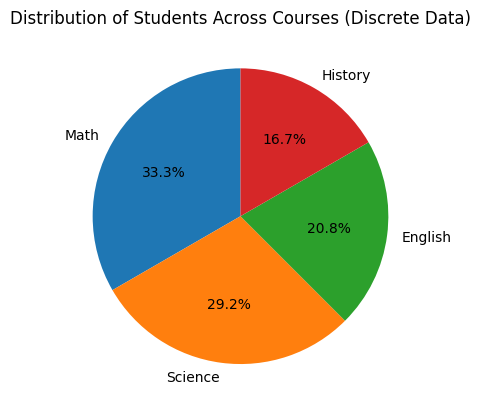

In [72]:
courses = ["Math", "Science", "English", "History"]
students = [40, 35, 25, 20]

plt.pie(students, labels=courses, autopct="%1.1f%%", startangle=90)
plt.title("Distribution of Students Across Courses (Discrete Data)")
plt.show()

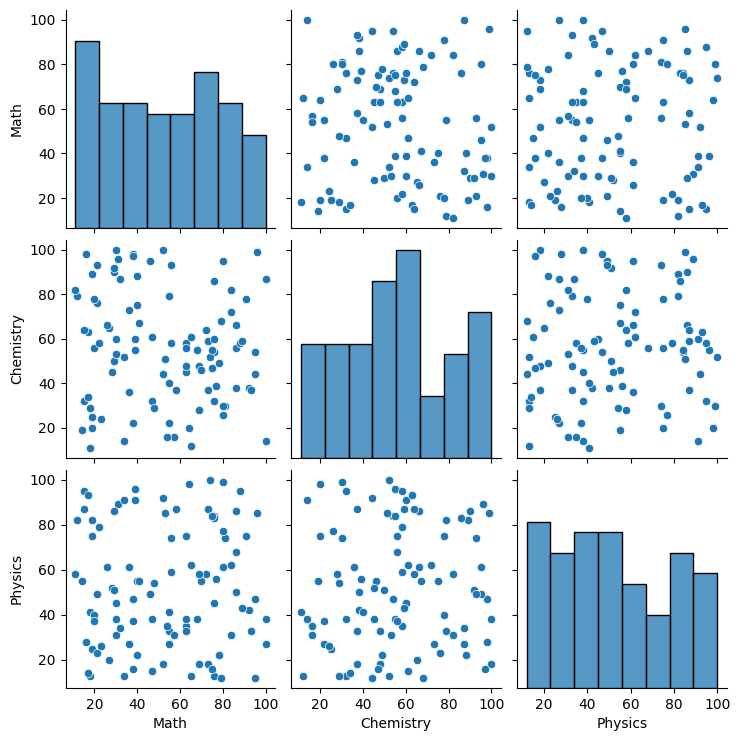

In [78]:
sns.pairplot(df[['Math','Chemistry','Physics']])

In [80]:
data = {
    "Customer": ["A", "B", "C", "D", "E"],
    "LoanAmount": [10000, np.nan, 5000, np.nan, np.nan],
    "Feedback": ["Good", np.nan, "Bad", np.nan, "Average"],
    "Income": [50000, 60000, np.nan, 45000, np.nan]
}
df = pd.DataFrame(data)

print("Before Domain-Specific Imputation:")
print(df)

df['LoanAmount'] = df['LoanAmount'].fillna(0)
df['Feedback'] = df['Feedback'].fillna("No Feedback")
df['Income'] = df['Income'].fillna(50000)

print("\nAfter Domain-Specific Imputation:")
print(df)

Before Domain-Specific Imputation:
  Customer  LoanAmount Feedback   Income
0        A     10000.0     Good  50000.0
1        B         NaN      NaN  60000.0
2        C      5000.0      Bad      NaN
3        D         NaN      NaN  45000.0
4        E         NaN  Average      NaN

After Domain-Specific Imputation:
  Customer  LoanAmount     Feedback   Income
0        A     10000.0         Good  50000.0
1        B         0.0  No Feedback  60000.0
2        C      5000.0          Bad  50000.0
3        D         0.0  No Feedback  45000.0
4        E         0.0      Average  50000.0
